## Classify Genres From Audio Data

## Preparing our dataset

In [2]:
import pandas as pd

# Read in track metadata with genre labels
tracks = pd.read_csv(filepath_or_buffer="datasets/fma-rock-vs-hiphop.csv")

# Read in track metrics with the features
echonest_metrics = pd.read_json(path_or_buf="datasets/echonest-metrics.json",precise_float=True)

# Merge the relevant columns of tracks and echonest_metrics
echo_tracks = pd.merge(echonest_metrics,tracks[['track_id','genre_top']],on='track_id')

# Inspect the resultant dataframe
echo_tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4801
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4802 non-null   int64  
 1   acousticness      4802 non-null   float64
 2   danceability      4802 non-null   float64
 3   energy            4802 non-null   float64
 4   instrumentalness  4802 non-null   float64
 5   liveness          4802 non-null   float64
 6   speechiness       4802 non-null   float64
 7   tempo             4802 non-null   float64
 8   valence           4802 non-null   float64
 9   genre_top         4802 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 412.7+ KB


## Pairwise relationships between continuous variables

In [3]:
echo_tracks.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,Hip-Hop
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,Hip-Hop
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,Hip-Hop
3,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,Hip-Hop
4,153,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018,Rock


## Normalizing the feature data

In [4]:
# Define our features 
features = echo_tracks.drop(columns=['genre_top','track_id'])
labels = echo_tracks['genre_top']
from sklearn.preprocessing import StandardScaler

# Scale the features and set the values to a new variable
scaler = StandardScaler()
scaled_train_features = scaler.fit_transform(features)
print(scaled_train_features)

[[-0.19121034  1.30442004  0.03831594 ...  0.37303429  1.15397908
   0.46228696]
 [-0.30603598  0.50188641  0.78817624 ...  2.44615517  0.00791367
  -0.69081137]
 [-1.20481276  1.68413943  0.31285194 ...  0.13513049 -0.77731688
   0.63107745]
 ...
 [-1.29470431  1.17682795  0.13265633 ...  0.85182206 -0.93541008
  -0.07941825]
 [-1.13869115 -0.02253433  0.57117905 ...  1.40951543  1.31301348
   0.47513794]
 [-0.90611434  1.10148973  0.56322452 ...  1.36030881 -1.43669053
   0.76217464]]


## Principal Component Analysis on our scaled data

[0.24297674 0.18044316 0.13650309 0.12994089 0.11056248 0.08302245
 0.06923783 0.04731336]
[[-4.33617070e-03  5.79543156e-01 -2.36263229e-01 -4.35063179e-01
  -5.46236491e-02  4.32381961e-01 -1.79477383e-01  4.43689769e-01]
 [-5.43521941e-01 -9.29911248e-02  5.89109033e-01 -3.44259355e-01
   2.59405544e-01  8.46847426e-02  3.49788708e-01  1.83187644e-01]
 [ 2.86043643e-01 -2.48800804e-01 -1.68840803e-01 -2.66350128e-01
   6.56826885e-01  4.36291451e-01  2.75628055e-04 -3.67499284e-01]
 [ 4.77238876e-01 -9.68661663e-02  4.79983348e-03  1.00253883e-01
  -2.08763560e-01  2.42021088e-01  7.57582026e-01  2.76946140e-01]
 [ 2.98644311e-01  1.91995892e-01  1.83922307e-01  3.17850924e-01
   6.10719051e-01 -3.19352594e-01 -1.19244387e-01  4.99909458e-01]
 [ 2.77995583e-01 -4.73875658e-02  6.56791470e-01  2.05759011e-01
  -2.24694808e-01  4.74804140e-01 -4.11318550e-01 -4.06372989e-02]
 [-4.18338999e-01  3.10217608e-01 -1.47037071e-01  6.69051333e-01
   1.75009382e-01  4.18174935e-01  1.82722016

Text(0.5, 0, 'Principal Component #')

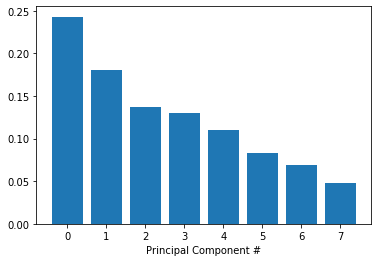

In [5]:
# This is just to make plots appear in the notebook
%matplotlib inline

# Import our plotting module, and PCA class
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Get our explained variance ratios from PCA using all features
pca = PCA()
pca.fit(scaled_train_features)
exp_variance = pca.explained_variance_ratio_
print(exp_variance)
print(pca.components_)

# plot the explained variance using a barplot
fig, ax = plt.subplots()
ax.bar(range(features.shape[1]),exp_variance)
ax.set_xlabel('Principal Component #')

## Further visualization of PCA

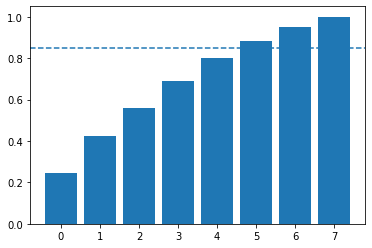

In [6]:
import numpy as np
cum_exp_variance = np.cumsum(exp_variance)

fig, ax = plt.subplots()
ax.bar(range(features.shape[1]),cum_exp_variance)
ax.axhline(y=0.85, linestyle='--')

n_components = 6

pca = PCA(n_components, random_state=10)
pca.fit(scaled_train_features)
pca_projection = pca.transform(scaled_train_features)

## Train a decision tree to classify genre

In [8]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

train_features, test_features, train_labels, test_labels = train_test_split(pca_projection,labels,random_state=10)

# Train our decision tree
tree = DecisionTreeClassifier(random_state=10)
tree.fit(train_features,train_labels)

# Predict the labels for the test data
pred_labels_tree = tree.predict(test_features)


## Compare our decision tree to a logistic regression

In [9]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=10)
logreg.fit(train_features,train_labels)
pred_labels_logit = logreg.predict(test_features)

# Create the classification report for both models
from sklearn.metrics import classification_report
class_rep_tree = classification_report(test_labels,pred_labels_tree)
class_rep_log = classification_report(test_labels,pred_labels_logit)

print("Decision Tree: \n", class_rep_tree)
print("Logistic Regression: \n", class_rep_log)

Decision Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.60      0.60      0.60       235
        Rock       0.90      0.90      0.90       966

    accuracy                           0.84      1201
   macro avg       0.75      0.75      0.75      1201
weighted avg       0.84      0.84      0.84      1201

Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.77      0.54      0.64       235
        Rock       0.90      0.96      0.93       966

    accuracy                           0.88      1201
   macro avg       0.83      0.75      0.78      1201
weighted avg       0.87      0.88      0.87      1201



## Balance our data for greater performance

In [10]:
echo_tracks.loc[echo_tracks['genre_top']=='Hip-Hop']

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
0,2,0.416675,0.675894,0.634476,1.062807e-02,0.177647,0.159310,165.922,0.576661,Hip-Hop
1,3,0.374408,0.528643,0.817461,1.851103e-03,0.105880,0.461818,126.957,0.269240,Hip-Hop
2,5,0.043567,0.745566,0.701470,6.967990e-04,0.373143,0.124595,100.260,0.621661,Hip-Hop
3,134,0.452217,0.513238,0.560410,1.944269e-02,0.096567,0.525519,114.290,0.894072,Hip-Hop
118,583,0.748986,0.765886,0.513173,9.572095e-01,0.614844,0.886914,180.025,0.401672,Hip-Hop
...,...,...,...,...,...,...,...,...,...,...
4797,124718,0.412194,0.686825,0.849309,6.000000e-10,0.867543,0.367315,96.104,0.692414,Hip-Hop
4798,124719,0.054973,0.617535,0.728567,7.215700e-06,0.131438,0.243130,96.262,0.399720,Hip-Hop
4799,124720,0.010478,0.652483,0.657498,7.098000e-07,0.701523,0.229174,94.885,0.432240,Hip-Hop
4800,124721,0.067906,0.432421,0.764508,1.625500e-06,0.104412,0.310553,171.329,0.580087,Hip-Hop


In [11]:
hop_only = echo_tracks.loc[echo_tracks['genre_top']=='Hip-Hop']
rock_only = echo_tracks.loc[echo_tracks['genre_top']=='Rock']

rock_only = rock_only.sample(hop_only.shape[0],random_state=10)
rock_hop_bal = pd.concat([rock_only,hop_only])

# The features, labels, and pca projection are created for the balanced dataframe
features = rock_hop_bal.drop(['genre_top', 'track_id'], axis=1) 
labels = rock_hop_bal['genre_top']
pca_projection = pca.fit_transform(scaler.fit_transform(features))

# Redefine the train and test set with the pca_projection from the balanced data
train_features, test_features, train_labels, test_labels = train_test_split(pca_projection,labels, random_state=10)

## Balancing our dataset to improve model bias

In [12]:

tree = DecisionTreeClassifier(random_state=10)
tree.fit(train_features,train_labels)
pred_labels_tree = pred_labels_tree = tree.predict(test_features)
logreg = LogisticRegression(random_state=10)
logreg.fit(train_features,train_labels)
pred_labels_logit = logreg.predict(test_features)
print("Decision Tree: \n", classification_report(test_labels,pred_labels_tree))
print("Logistic Regression: \n", classification_report(test_labels,pred_labels_logit))

Decision Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.74      0.73      0.74       230
        Rock       0.73      0.74      0.73       225

    accuracy                           0.74       455
   macro avg       0.74      0.74      0.74       455
weighted avg       0.74      0.74      0.74       455

Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.84      0.80      0.82       230
        Rock       0.80      0.85      0.83       225

    accuracy                           0.82       455
   macro avg       0.82      0.82      0.82       455
weighted avg       0.82      0.82      0.82       455



## Using cross-validation to evaluate our models

In [13]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=10)
tree = DecisionTreeClassifier(random_state=10)
logreg = LogisticRegression(random_state=10)
tree_score =cross_val_score(tree,pca_projection,labels,cv=kf)
logit_score = cross_val_score(logreg,pca_projection,labels,cv=kf)
print("Decision Tree:", np.mean(tree_score), "Logistic Regression:", np.mean(logit_score))

Decision Tree: 0.7489010989010989 Logistic Regression: 0.782967032967033
